In [3]:
from PIL import Image
from IPython.display import display
import numpy as np
import math
from pint import UnitRegistry as ureg

# Unit Conversion Tool

In [12]:
#We created a dictionary that contains all the unit conversions, and then made a
#function that takes an input, 2 units, and then computes the conversion

#First we made a library
#This also makes it very easy to add unit conversions when necessary
#Conversions with value having multiple units i.e. lb ft and Nm are also stored here,

conversion_factors = {
    ("lb ft", "Nm"): 1.35582,
    ("Nm", "lb ft"): 1/1.35582,
    ("lbs", "kg"): 0.453592,
    ("kg", "lbs"): 1/0.453592,
    ("miles", "km"): 1.60934,
    ("km", "miles"): 1/1.60934,
    ("m", "ft"):3.28084,
    ("ft", "m"):1/3.28084,
    ("degrees", "radians"): 3.14/180,
    ("radians", "degrees"): 180/3.14
}

#Create a function that can read these units
def unit_conversions(value, from_, to):
    if(from_, to) in conversion_factors:
        return value*conversion_factors[(from_,to)]
    else:
        return "Conversion not in library"

#Print Example for User Use
print(unit_conversions(10, "km","miles"))

6.213727366498068


# Problem #2

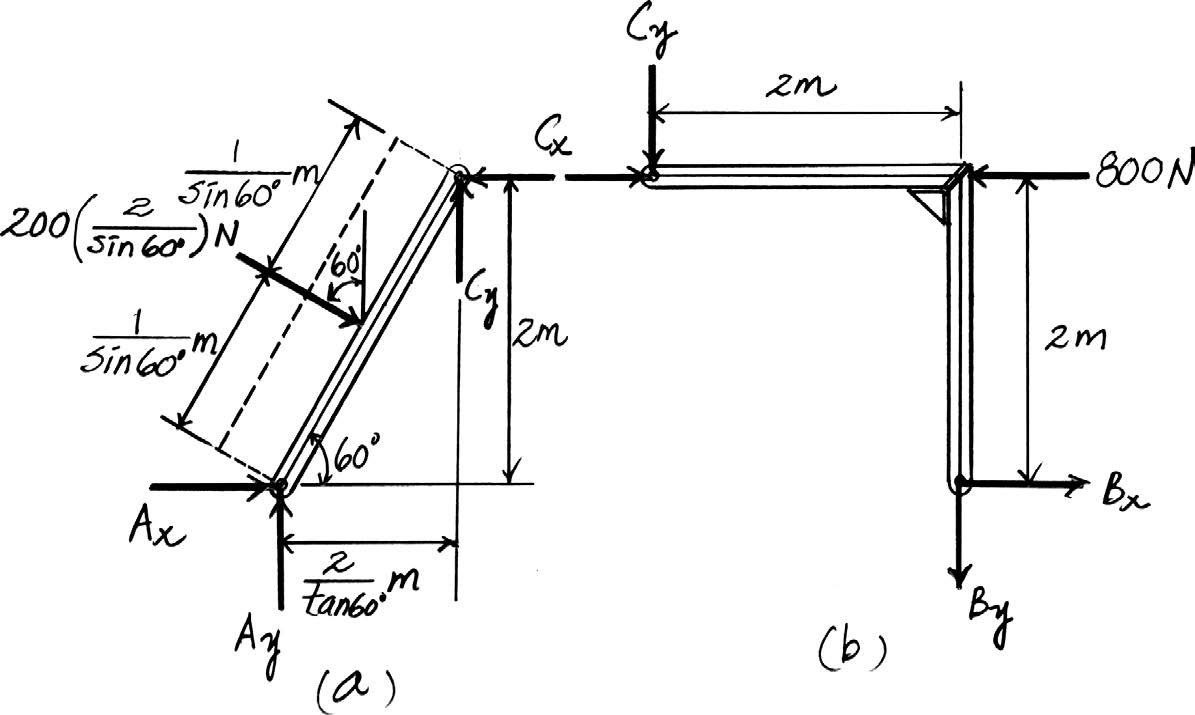

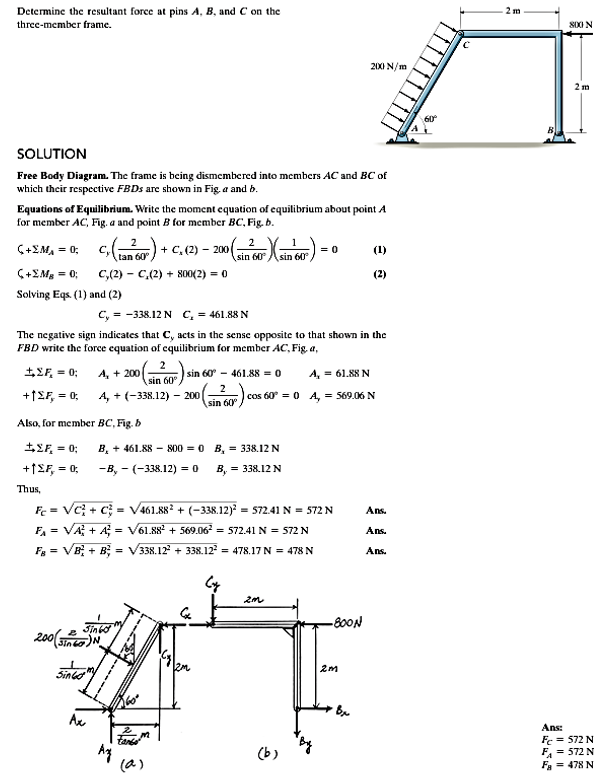

In [51]:
problem2 = Image.open('FBD Problem #2.png')
display(problem2)
solution2 = Image.open('Problem #2 Solutions.png')
display(solution2)

In [5]:
#Problem 2: Solution
#Defining Variables
dist_load = 200
thetaA_deg = 60 
thetaA_rad = np.radians(thetaA_deg)
dist_x = 2
dist_y = 2
force_B = 800

def problem2__(dist_load, thetaA_deg, dist_x, dist_y, force_B):
    thetaA_rad = np.radians(thetaA_deg)
    
    # Step 1: Solve for Cx and Cy
    A = np.array([[dist_y, dist_y / np.tan(thetaA_rad)], [-dist_y, dist_x]])
    B = np.array([dist_load * ((dist_y / 2) / np.sin(thetaA_rad)) * (dist_y / np.sin(thetaA_rad)), -force_B * dist_y])
    x = np.linalg.solve(A, B)
    
    Cx, Cy = x[0], x[1]
    
    # Step 2: Compute Ax and Ay using force equilibrium at A
    Ax = -(dist_load * (2 / np.sin(thetaA_rad)) * np.sin(thetaA_rad)) + Cx
    Ay = dist_load * (2 / np.sin(thetaA_rad)) * np.cos(thetaA_rad) - Cy
    
    # Step 3: Compute Bx and By using force equilibrium at B
    Bx = force_B - Cx
    By = -Cy
    
    # Step 4: Compute magnitudes of the reaction forces
    Fc = np.sqrt(Cx**2 + Cy**2)
    Fa = np.sqrt(Ax**2 + Ay**2)
    Fb = np.sqrt(Bx**2 + By**2)
    
    # Print results
    print("\nComputed Force Components:")
    print(f"Fa = {Fa:.2f} N")
    print(f"Fb = {Fb:.2f} N")
    print(f"Fc = {Fc:.2f} N")
    
problem2__(200, 60, 2, 2, 800)



Computed Force Components:
Fa = 572.41 N
Fb = 478.17 N
Fc = 572.41 N


# Problem #3

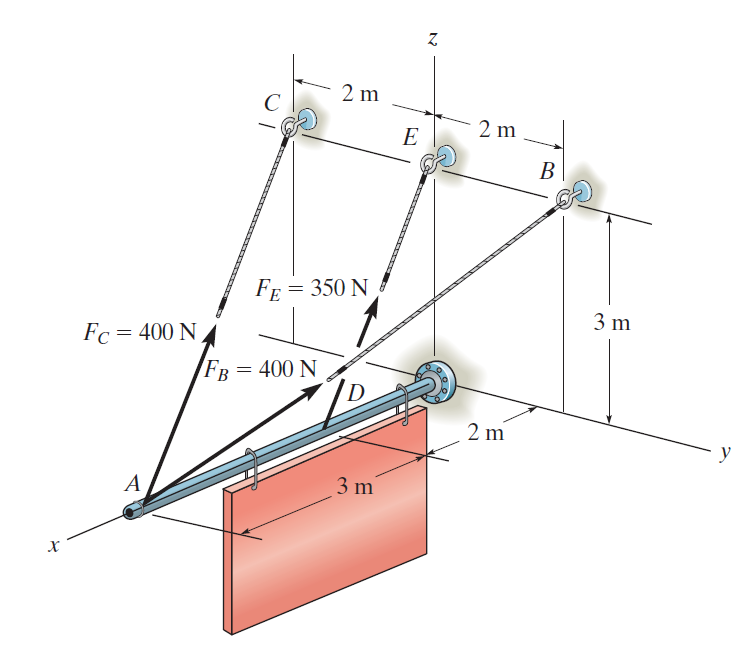

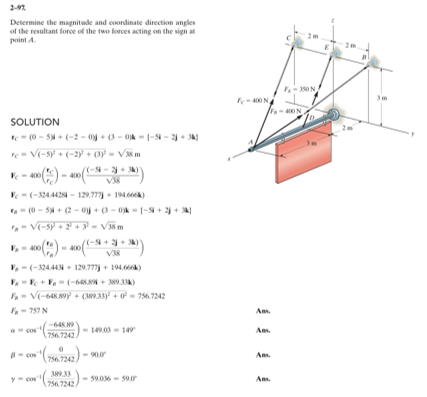

In [8]:
problem3 = Image.open('FBD Problem #3.PNG')
display(problem3)
solution3 = Image.open('Problem #3 Solutions.png')
display(solution3)

In [58]:
#Problem 3: Solution
#User Input Flexibility Option
Ax = float(input("Enter the x-coordinate of A: "))
Ay = float(input("Enter the y-coordinate of A: "))
Az = float(input("Enter the z-coordinate of A: "))
Cx = float(input("Enter the x-coordinate of C: "))
Cy = float(input("Enter the y-coordinate of C: "))
Cz = float(input("Enter the z-coordinate of C: "))
F_C = float(input("Enter the force C in Newtons: "))
Bx = float(input("Enter the x-coordinate of B: "))
By = float(input("Enter the y-coordinate of B: "))
Bz = float(input("Enter the z-coordinate of B: "))
F_B = float(input("Enter the force B in Newtons: "))

# Create a function that solves for F_R, alpha, beta, and gamma
def problem2(Ax, Ay, Az, Cx, Cy, Cz, F_C, Bx, By, Bz, F_B):
    #Find the vector rc to then find FC in components
    rc_i = (Cx - Ax)
    rc_j = (Cy - Ay)
    rc_k = (Cz - Az)
    rc = ((rc_i**2) + (rc_j**2) + (rc_k**2))**(1/2)
    FC_i = (F_C / rc)*rc_i
    FC_j = (F_C / rc)*rc_j
    FC_k = (F_C / rc)*rc_k
    #Find the vector rb to then find FB in components
    rb_i = (Bx - Ax)
    rb_j = (By - Ay)
    rb_k = (Bz - Az)
    rb = ((rb_i**2) + (rb_j**2) + (rb_k**2))**(1/2)
    FB_i = (F_B / rb) *rb_i
    FB_j = (F_B / rb) *rb_j
    FB_k = (F_B / rb) *rb_k
    #Find FR, since FR = FB + FC
    FR_i = FC_i + FB_i
    FR_j = FC_j + FB_j
    FR_k = FC_k + FB_k
    FR = ((FR_i**2) + (FR_j**2) + (FR_k**2))**(1/2)
    #Solve for the angles
    alpha = np.degrees(np.arccos(FR_i / FR))
    beta = np.degrees(np.arccos(FR_j / FR))
    gamma = np.degrees(np.arccos(FR_k / FR))
    return FR, alpha, beta, gamma

FR, alpha, beta, gamma  = problem2(Ax, Ay, Az, Cx, Cy, Cz, F_C, Bx, By, Bz, F_B) 

#Print each thing to ensure accuracy
print("The resultant force in Newtons is {}".format(FR))
print("Alpha in degrees is {}".format(alpha))
print("Beta in degrees is {}".format(beta))
print("Gamma in degrees is {}".format(gamma))

Enter the x-coordinate of A:  200
Enter the y-coordinate of A:  200
Enter the z-coordinate of A:  200
Enter the x-coordinate of C:  200
Enter the y-coordinate of C:  200
Enter the z-coordinate of C:  20
Enter the force C in Newtons:  200
Enter the x-coordinate of B:  300
Enter the y-coordinate of B:  300
Enter the z-coordinate of B:  300
Enter the force B in Newtons:  300


The resultant force is 246.41016151377548
Alpha in degrees is 45.33875868322608
Beta in degrees is 45.33875868322608
Gamma in degrees is 96.24275228461494


# Problem #4

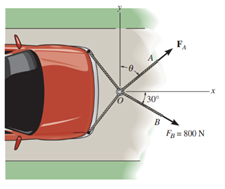

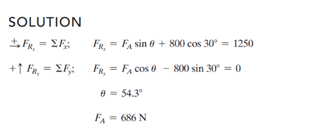

In [27]:
problem4 = Image.open('FBD Problem #4.png')
display(problem4)
solution4 = Image.open('Problem #4 Solutions.png')
display(solution4)

In [16]:
#User input for the 3 needed values
FB = float(input("Enter the resultant force B: "))
RF = float(input("Enter the total force: "))
theta = float(input("Enter the resultant angle in degrees: ")) * (np.pi / 180)

#Solve for the unknown angle at B using a function
def problem4_1(FB, RF, theta):

    solvetheta = np.arctan(((RF - (FB * np.cos(theta))) / (FB * np.sin(theta)))) * (180/np.pi)

    return(solvetheta)

#Solve for the unknown resultant force at A using a function
def problem4_2(FB, theta, solvetheta):

    solveFA = (FB * np.sin(theta)) / (np.cos(solvetheta*(np.pi / 180)))

    return(solveFA)

solvetheta = problem4_1(FB, RF, theta)
solveFA = problem4_2(FB, theta, solvetheta)

#Print the function to users
print("The resultant force in Newtons at A is {}" .format(solveFA))
print("The angle at B in degrees is {}" . format(solvetheta))

Enter the resultant force B:  800
Enter the total force:  1250
Enter the resultant angle in degrees:  30


The resultant force in Newtons at A is 685.8929890523174
The angle at B in degrees is 54.3253855640526
